ข้อมูลการขาดสารอาหารของประเทศต่างๆตั้งแต่ปี 1983-2019
การขาดสารอาหารยังคงเป็นสาเหตุที่ทำให้เด็ก ๆ เสี่ยงต่อการเป็นโรคและเสียชีวิตมากขึ้น มีข้อมูล 924 รายการ
การขาดสารอาหารมี 4 ประเภทกว้าง ๆ ได้แก่ 
1. ภาวะผอมรุนแรง(Severe Wasting)
1. ภาวะขาดสารอาหารเฉียบพลัน (wasted)
2. ภาวะแคระแกร็น (Stunting)
2. น้ำหนักน้อย (Underweight)
2. น้ำหนักเกิน (Overweight)

มี 20 Column ได้แก่
1. Index
1.	ISO code (รหัส ISO)
2.	Country (ประเทศ)*
3.	Survey Year (ปีที่สำรวจ)
4.	Year (ปี)
5.	Income Classification (การจำแนกรายได้)
6.	LDC (LDC ประเทศที่พัฒนาน้อยที่สุด)
7.	LIFD (LIFDประเทศที่ขาดอาหารที่มีรายได้ต่ำ)
8.	LLDC or SID2 (ประเทศกำลังพัฒนาที่ไม่มีทางออกทะเล (LLDC) ได้แก่ 1, ประเทศกําลังพัฒนาที่เป็นเกาะขนาดเล็ก (SIDS) คือ 2, อื่น ๆ คือ 0)
9.	Survey Sample (N) (จำนวนตัวอย่างการสำรวจ)
10.	Severe Wasting (เปอร์เซ็นต์ภาวะผอมรุนแรง)*
11.	Wasting (เปอร์เซ็นต์ภาวะขาดสารอาหารเฉียบพลัน)*
12.	Overweight (เปอร์เซ็นต์น้ำหนักเกิน)*
13.	Stunting (เปอร์เซ็นต์ภาวะแคระแกร็น)*
14.	Underweight (เปอร์เซ็นต์น้ำหนักน้อย)*
15.	Notes (หมายเหตุ)
16.	Report Author (หน่วยงานที่เขียนรายงาน)
17.	Source (ที่มา)
18.	Short Source (แหล่งข้อมูล)
19.	U5 Population ('000s) (ประชากร)*


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from google.colab import drive
sns.set(style="whitegrid")
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# https://www.kaggle.com/ruchi798/malnutrition-across-the-globe/notebooks
data1 = pd.read_csv("/content/drive/My Drive/1_1/88950162ToolsforDataScience/data/country-wise-average.csv")
data2 = pd.read_csv("/content/drive/My Drive/1_1/88950162ToolsforDataScience/data/malnutrition-estimates.csv")
#เติมข้อมูลที่ขาดไปด้วย0
data1.fillna(0,inplace=True)
data2.fillna(0,inplace=True)
# ลบข้อมูล Column ที่ไม่ได้ใช้
data2.drop(['Unnamed: 0','Notes','Survey Year','Survey Sample (N)'], axis=1, inplace=True)
data2

,ISO code,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,0,1.0,1.0,1.0,0.0,18.2,6.5,53.2,44.9,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,AFG,AFGHANISTAN,2004,0,1.0,1.0,1.0,3.5,8.6,4.6,59.3,32.9,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,AFG,AFGHANISTAN,2013,0,1.0,1.0,1.0,4.0,9.5,5.3,40.4,24.6,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,AFG,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,ALB,ALBANIA,1997,2,0.0,0.0,0.0,0.0,8.1,9.5,20.4,7.1,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,ZWE,ZIMBABWE,2009,1,0.0,1.0,1.0,0.5,2.4,3.5,35.1,11.7,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,ZWE,ZIMBABWE,2010,1,0.0,1.0,1.0,0.8,3.2,5.8,32.2,10.2,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,ZWE,ZIMBABWE,2014,1,0.0,1.0,1.0,0.7,3.2,3.6,27.6,11.2,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,ZWE,ZIMBABWE,2015,1,0.0,1.0,1.0,1.1,3.3,5.6,27.1,8.5,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


1. จากประเทศที่มีรายได้และจำนวนประชากรสูงสุด 10 อันดับ ประเทศใดที่มีค่าเฉลี่ยของเด็กที่มีน้ำหนักน้อย(Underweight)และน้ำหนักเกิน(Overweight)มากที่สุดอย่างไร

In [6]:
sf = data1[data1['Income Classification']==3]
data1_=sf[["U5 Population ('000s)","Country","Overweight","Underweight"]].sort_values(by ="U5 Population ('000s)",ascending = False ).head(10)
data1_

,U5 Population ('000s),Country,Overweight,Underweight
143,20077.909571,UNITED STATES OF AMERICA (THE),7.414286,0.880000
66,5554.144000,JAPAN,1.500000,3.400000
53,3641.690000,GERMANY,3.350000,0.800000
115,2744.397000,SAUDI ARABIA,3.650000,9.400000
108,2487.097000,REPUBLIC OF KOREA (THE),6.750000,0.800000
106,1951.373000,POLAND,0.000000,0.000000
26,1697.603000,CANADA,10.400000,0.000000
6,1443.074500,AUSTRALIA,13.875000,0.100000
29,1303.080133,CHILE,11.313333,0.746667
37,543.606500,CZECHIA,5.550000,1.500000


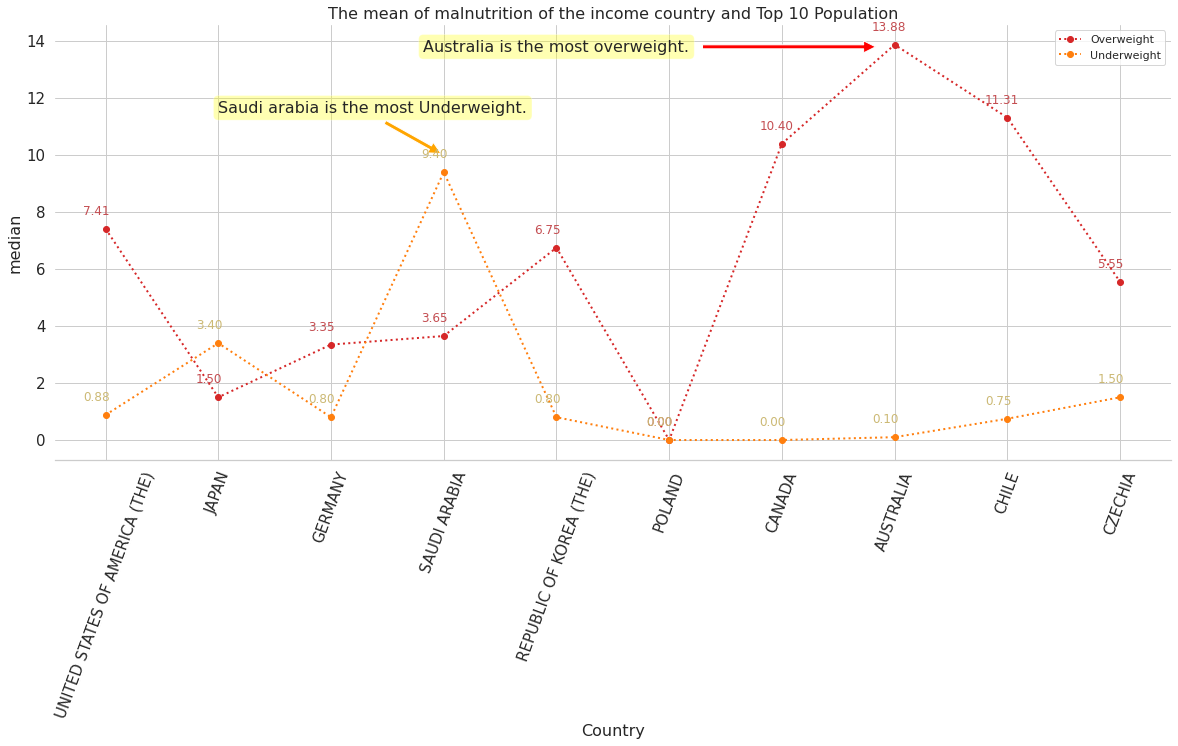

In [5]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
x = data1_['Country'] # create data
ax.plot(x,data1_['Overweight'], 'bo:', label='Overweight', color='tab:red',lw=2)
ax.plot(x,data1_['Underweight'], 'bo:', label='Underweight', color='tab:orange',lw=2)
sns.set(style="whitegrid")
#กำหนดชื่อและขนาดตัวอักษรแกนxy
ax.set_xlabel('Country', fontsize=16) 
ax.set_ylabel('median', fontsize=16)
# ค่าเฉลี่ยของการขาดสารอาหารของประเทศที่มีรายได้และประชากร 10 อันดับแรก
ax.set_title("The mean of malnutrition of the income country and Top 10 Population",fontsize=16) 
#ขนาดตัวอักษรแกนxy
ax.tick_params(labelsize=15)
#องศาของชื่อแกน x
for tick in ax.get_xticklabels():
 tick.set_rotation(70)
 # การปรับแต่งกรอบกราฟ
sns.despine(left=True);
#ออสเตรเลียมีน้ำหนักเกินมากที่สุด   
plt.annotate('Australia is the most overweight.',xy=(6.9, 13.8),
             xytext=(4, 13.8),size=16, ha='center', va="center",
             bbox=dict(boxstyle="round", fc='yellow', alpha=0.3),arrowprops=dict(facecolor='red', shrink=0.04),
             )
#ซาอุดีอาระเบียมีน้ำหนักน้อยที่สุด
plt.annotate('Saudi arabia is the most Underweight.',xy=(3, 10),
             xytext=(1, 11.5),size=16,
             bbox=dict(boxstyle="round", fc='yellow', alpha=0.3),arrowprops=dict(facecolor='orange', shrink=0.04),
             )
# แสดงจำนวนบนกราฟ
for i, v in enumerate(data1_["Overweight"].items()):  
  ax.text(i-0.2,v[1]+0.5, "{:.2f}".format(v[1]), color='r', rotation=0)
for i, v in enumerate(data1_["Underweight"].items()):  
  ax.text(i-0.2,v[1]+0.5, "{:.2f}".format(v[1]), color='y', rotation=0)
ax.legend()
plt.show()# คำสั่งให้แสดง

2. ประเทศไทยมีสถานะการขาดสารอาหารใดมากที่สุด

จากกราฟสถานะการขาดสารอาหารในประเทศไทย มีค่าเฉลี่ยการขาดสารอาหารของสถานะ Stunting มีการที่สุด 40% ถัดมาเป็นสถานะของ Underweight

In [7]:
vcb=data1[data1['Country']=='THAILAND'][["Severe Wasting","Wasting","Overweight","Stunting","Underweight"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


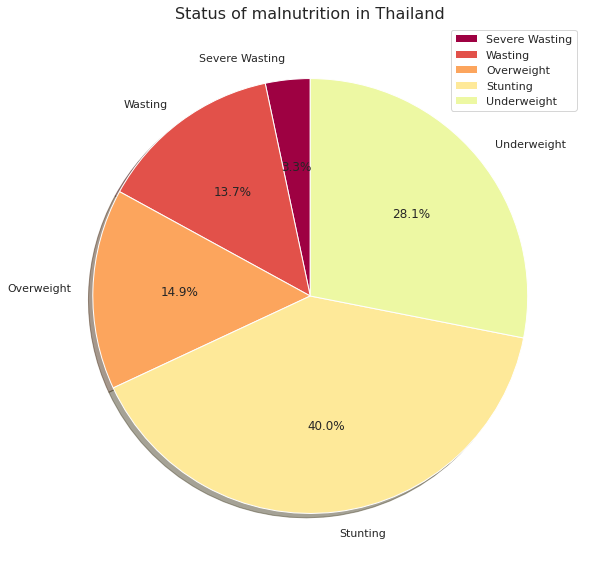

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
labels = 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting','Underweight'
sizes = [vcb['Severe Wasting'].values, vcb['Wasting'].values, vcb['Overweight'].values, vcb['Stunting'].values,vcb['Underweight'].values]
ax.pie(sizes,labels=labels, autopct='%.1f%%', shadow=True, startangle=90, colors=colors)
# สถานะการขาดสารอาหารในประเทศไทย
ax.set_title("Status of malnutrition in Thailand",fontsize=16)
ax.legend(labels, loc='upper right')
ax.set_aspect('equal')
plt.show()

3. ประเทศที่มีระดับการพัฒนาน้อยที่สุด(LDC)และมีจำนวนประชากรมาก 10 อันดับ ที่น้ำหนักน้อย(Underweight)และน้ำหนักเกิน(Overweight)มีค่าเฉลี่ยมากที่สุด

In [9]:
sds=data2[(data2['LDC'] == 1)]
cvx1=sds.groupby(['Country']).agg({"U5 Population ('000s)": "sum","Overweight":"mean","Underweight":"mean"}).sort_values(by ="U5 Population ('000s)",ascending = False ).head(10).reset_index()
cvx1.columns = ['Country',"U5 Population ('000s)","Overweight","Underweight"]
cvx1

,Country,U5 Population ('000s),Overweight,Underweight
0,BANGLADESH,380098.260,0.962500,46.266667
1,ETHIOPIA,97596.419,2.357143,31.057143
2,UNITED REPUBLIC OF TANZANIA (THE),81103.538,4.127273,17.727273
3,DEMOCRATIC REP. OF THE CONGO (THE),53105.401,4.600000,26.840000
4,UGANDA,50831.015,4.277778,15.533333
5,MYANMAR,45805.109,2.566667,29.755556
6,BURKINA FASO,36350.478,2.076923,25.076923
7,MALAWI,36143.502,6.486667,17.406667
8,NIGER (THE),34509.374,1.381818,38.263636
9,SENEGAL,28508.943,1.964286,16.300000


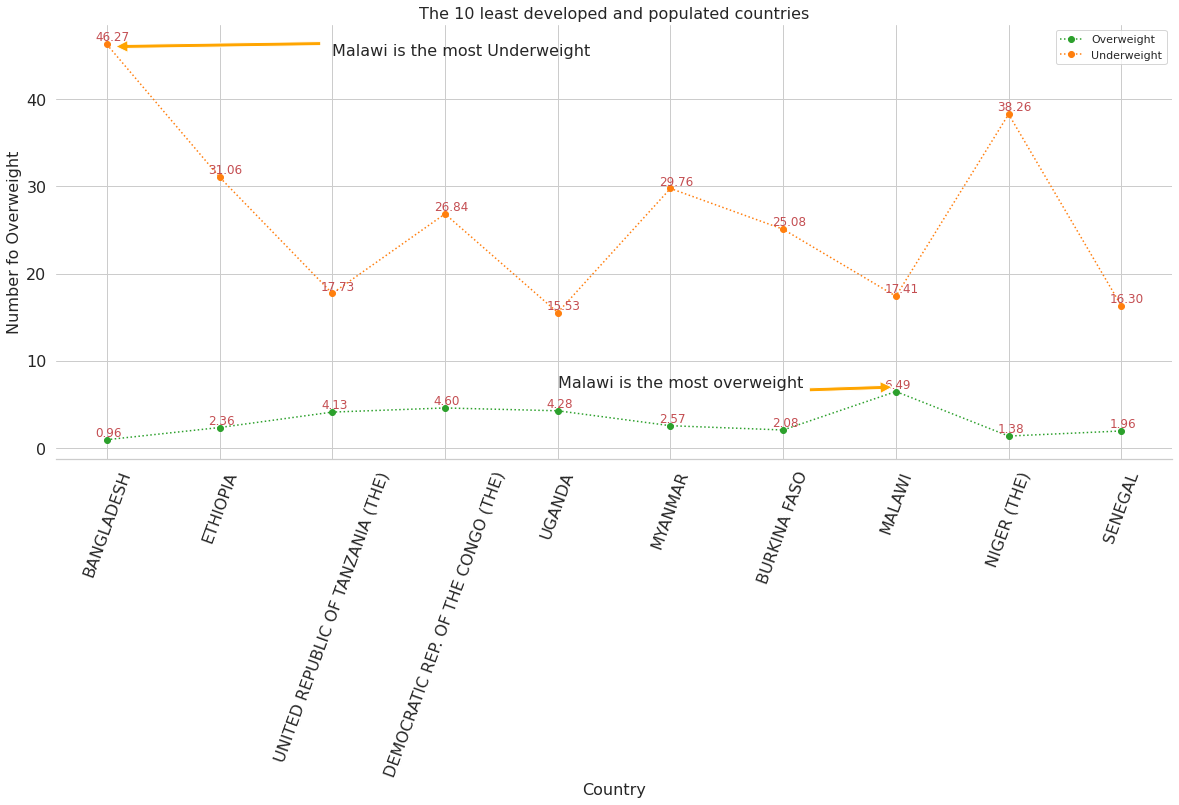

In [11]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
x = cvx1['Country'] # create data
ax.plot(x,cvx1['Overweight'], 'bo:',  label='Overweight', color='tab:green')
ax.plot(x,cvx1['Underweight'], 'bo:',  label='Underweight', color='tab:orange')
#  กำหนดชื่อและขนาดตัวอักษรแกนxy
plt.tick_params(labelsize=16)
#กำหนดชื่อและขนาดตัวอักษรแกนxy
ax.set_xlabel('Country', fontsize=16) 
ax.set_ylabel('Number fo Overweight', fontsize=16)
# 10 ประเทศที่พัฒนาและมีประชากรน้อยที่สุด
ax.set_title("The 10 least developed and populated countries",fontsize=16)
#องศาของชื่อแกน x 
for tick in ax.get_xticklabels():
 tick.set_rotation(70)
 # แสดงจำนวนบนกราฟ
for i, v in enumerate(cvx1['Overweight'].items()):  
  ax.text(i-0.1,v[1]+0.4, "{:.2f}".format(v[1]), color='r', rotation=0)
for i, v in enumerate(cvx1['Underweight'].items()):  
  ax.text(i-0.1,v[1]+0.4, "{:.2f}".format(v[1]), color='r', rotation=0)
sns.despine(left=True);
plt.annotate('Malawi is the most Underweight', xy=(0,46), xytext=(2,45),size=16,arrowprops=dict(facecolor='orange', shrink=0.04))
# มาลาวีมีน้ำหนักเกินมากที่สุด
plt.annotate('Malawi is the most overweight', xy=(7,7), xytext=(4,7),size=16,arrowprops=dict(facecolor='orange', shrink=0.04),)
ax.legend()
plt.show()

4. ค่าเฉลี่ยของประเทศที่มีรายได้ระดับ 2 มีสถานะภาวะขาดสารอาหารเฉียบพลัน (wasted) 10ปีย้อนหลัง ปีไหนน้อยสุด

In [12]:
sdsx=data2[(data2['Income Classification'] == 2)]
asd = sdsx.groupby(['Year'], sort=True)[['Wasting']].mean().sort_values(by ='Year',ascending = False).head(10).reset_index()
asd.columns = ['Year','Wasting']
asd

,Year,Wasting
0,2019,1.600000
1,2018,1.733333
2,2017,1.866667
3,2016,4.900000
4,2015,2.785714
5,2014,4.562500
6,2013,2.814286
7,2012,4.635714
8,2011,3.671429
9,2010,3.175000


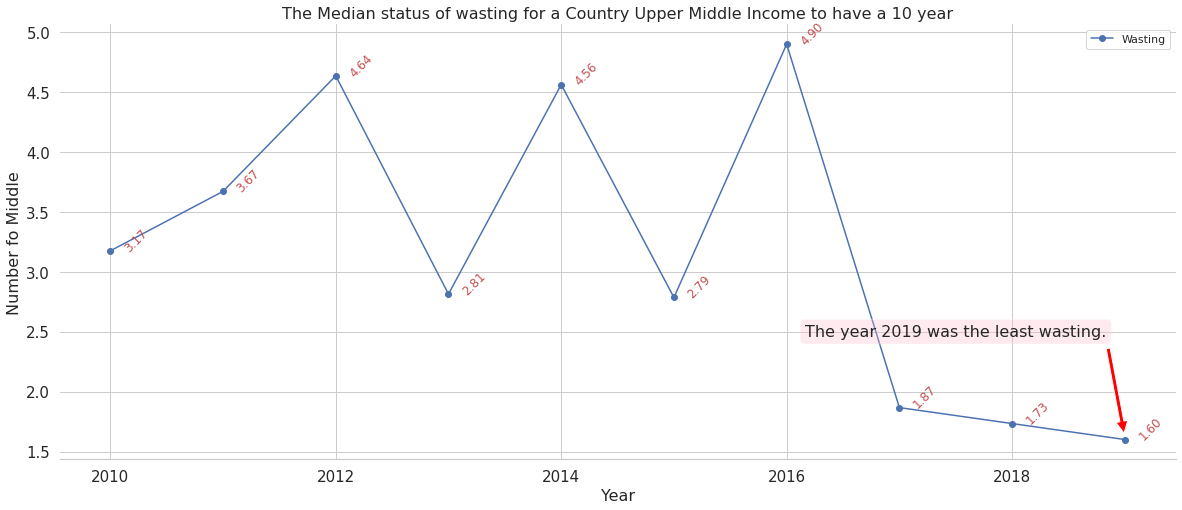

In [13]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
sns.set_theme(style="ticks")
ax.plot(asd['Year'],asd['Wasting'], 'o-',fillstyle='full', label='Wasting')
#กำหนดชื่อและขนาดตัวอักษรแกนxy
ax.set_xlabel('Year', fontsize=16) 
ax.set_ylabel('Number fo Middle', fontsize=16)
# ค่ามัธยฐานของประเทศที่มีรายได้ระดับ 2 มีสถานะภาวะขาดสารอาหารเฉียบพลัน 10 ปี
ax.set_title("The Median status of wasting for a Country Upper Middle Income to have a 10 year",fontsize=16) 
ax.tick_params(labelsize=15)

# # แสดงจำนวนบนกราฟ
for i, v in enumerate(asd['Wasting'][::-1].items()):  
  ax.text(i+2010.1,v[1], "{:.2f}".format(v[1]), color='r', rotation=45)
# ปี 2019 มีการสูญเสียน้อยที่สุด
plt.annotate('The year 2019 was the least wasting.', xy=(2019,1.62), xytext=(2017.5, 2.5),size=16, ha='center', va="center",bbox=dict(boxstyle="round",fc='pink', alpha=0.3),arrowprops=dict(facecolor='red', shrink=0.04))
sns.despine(left=True);
ax.grid(True)
ax.legend()
plt.show()

5. ประเทศที่เด็กมีน้ำหนักน้อย(underweight)จำนวนมากสุด 15 อันดับแรก มีประเทศใดมีจำนวนประชากรมากสุด

In [14]:
lpo=data1.sort_values(by ='Underweight',ascending = False).head(15)
lpo1=lpo.groupby(['Country'])[["U5 Population ('000s)"]].sum().reset_index()
lpo1.columns = ['Country',"Population"]
lpo1

,Country,Population
0,AFGHANISTAN,4918.561500
1,BANGLADESH,15837.427500
2,BURUNDI,1497.888000
3,CAMBODIA,1651.662167
4,CHAD,2024.290400
5,ERITREA,407.654500
6,ETHIOPIA,13942.345571
7,INDIA,123014.491000
8,LAO PEOPLE'S DEMOCRATIC REP. (THE),794.602857
9,MADAGASCAR,2932.928500


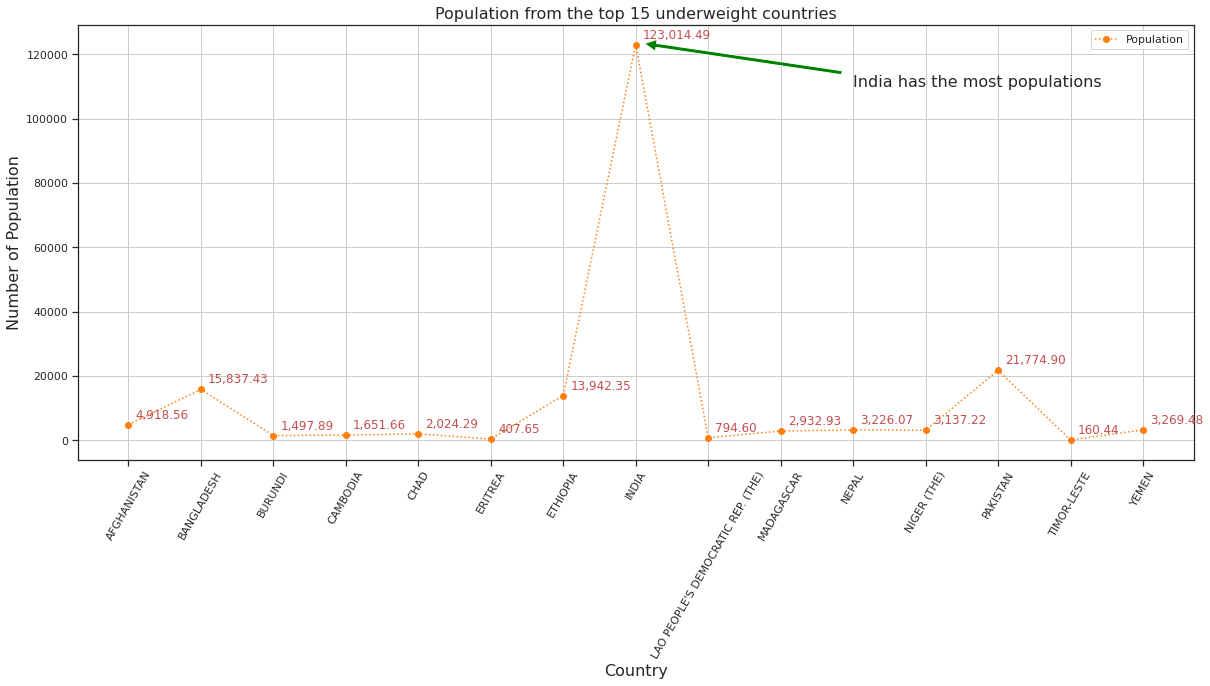

In [15]:

fig, ax = plt.subplots(figsize=(20,8))
x = lpo1['Country']
ax.plot(x,lpo1['Population'], 'bo:', label='Population', color='tab:orange')
#กำหนดชื่อและขนาดตัวอักษรแกนxy
ax.set_xlabel('Country', fontsize=16) 
ax.set_ylabel('Number of Population', fontsize=16)
# แสดงจำนวนบนกราฟ
for i, v in enumerate(lpo1['Population'].items()):  
  ax.text(i+0.1,v[1]+2000,"{:,.2f}".format(v[1]), color='r', rotation=0)
ax.set_title("Population from the top 15 underweight countries", fontsize=16) 
ax.set_xticklabels(x, rotation=60, ha="center")
ax.grid(True)
#อินเดียมีประชากรมากที่สุด
plt.annotate('India has the most populations', xy=(7,123700), xytext=(10, 110000),size=16,arrowprops=dict(facecolor='green', shrink=0.04),)
ax.legend()
plt.show()

6. 10 ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด

10 ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด ได้แก่ BANGLADESH,INDIA,TIMOR-LESTE,NIGER,YEMEN,ERITREA,NEPAL,MADAGASCAR,PAKISTAN,BURUNDI	

In [17]:
#6. 10 ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด  
sedo1=data1.groupby(['Country'])[["Underweight"]].sum().sort_values(by ='Underweight',ascending = False).head(10).reset_index()
sedo1.columns = ['Country',"Underweight"]
sedo1

,Country,Underweight
0,BANGLADESH,46.266667
1,INDIA,42.977778
2,TIMOR-LESTE,42.800000
3,NIGER (THE),38.263636
4,YEMEN,37.785714
5,ERITREA,37.550000
6,NEPAL,36.950000
7,MADAGASCAR,34.314286
8,PAKISTAN,33.737500
9,BURUNDI,32.250000


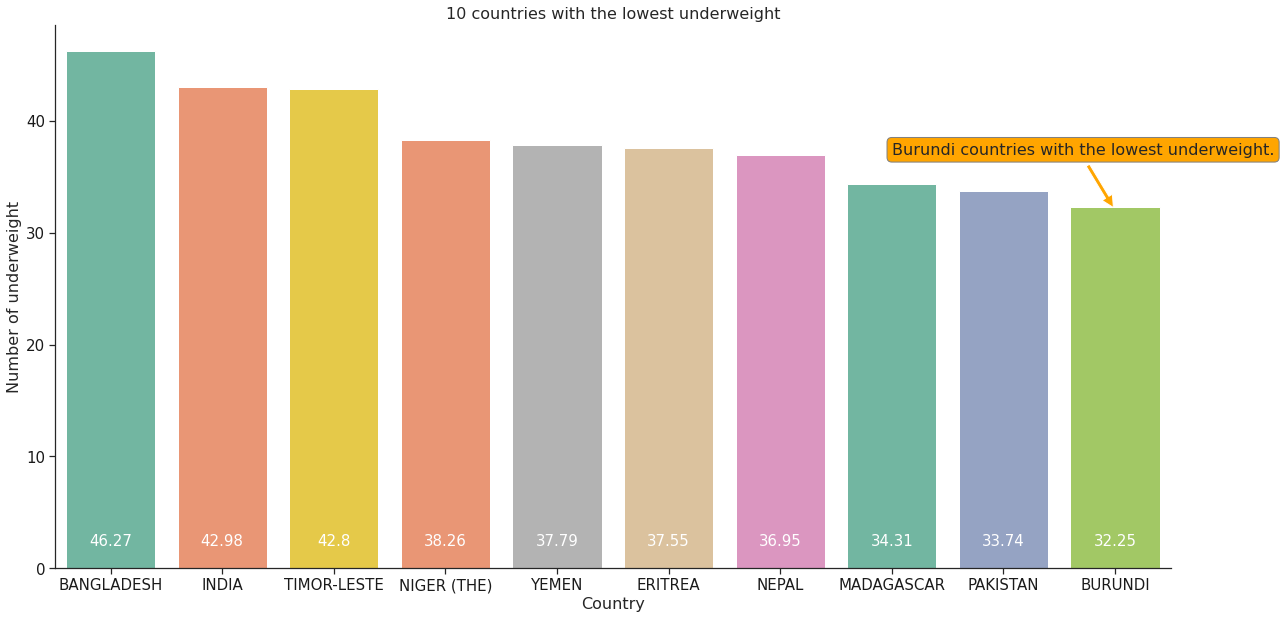

In [18]:

plt.figure(figsize=(20,10))
rank = sedo1["Country"].argsort()
pal = sns.color_palette("Set2", len(sedo1))
plt_=sns.barplot(x='Country',y='Underweight',data=sedo1, palette=np.array(pal)[rank])
for index, row in sedo1.iterrows():
 plt.text(row.name,2, round(row.Underweight,2), color='white', ha="center",fontsize=15)
for tick in plt_.get_xticklabels():
 tick.set_rotation(0)
# 10 ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด
plt.title('10 countries with the lowest underweight', fontsize=16)
plt.tick_params(labelsize=15,labelcolor='k')
plt.ylabel('Number of underweight',fontsize=16);
plt.xlabel('Country',fontsize=16);
sns.despine( right=True, left=False, );
# ประเทศที่มีผลการทบเกี่ยวกับภาวะโภชนาการน้อยที่สุด
plt.annotate('Burundi countries with the lowest underweight.', xy=(9,32),size=16, xytext=(7, 37),bbox=dict(boxstyle="round", fc="orange", ec="gray"),arrowprops=dict(facecolor='orange', shrink=0.05),)
plt.show()


In [ ]:
#7. อยากทราบค่าเฉลี่ยทั้งหมดทุกปีของประเทศกับการสูญเสียเฉลี่ยโดยรวมเป็นอย่างไร (แสดงเป็นกราฟ Graph map ตัวอย่าง https://tuangass.github.io/projects/networkx_basemap/img/map_3.png)

In [20]:
mnb = data1.groupby(['Country'], sort=True)[["Severe Wasting","Wasting","Overweight","Stunting","Underweight"]]
mnb

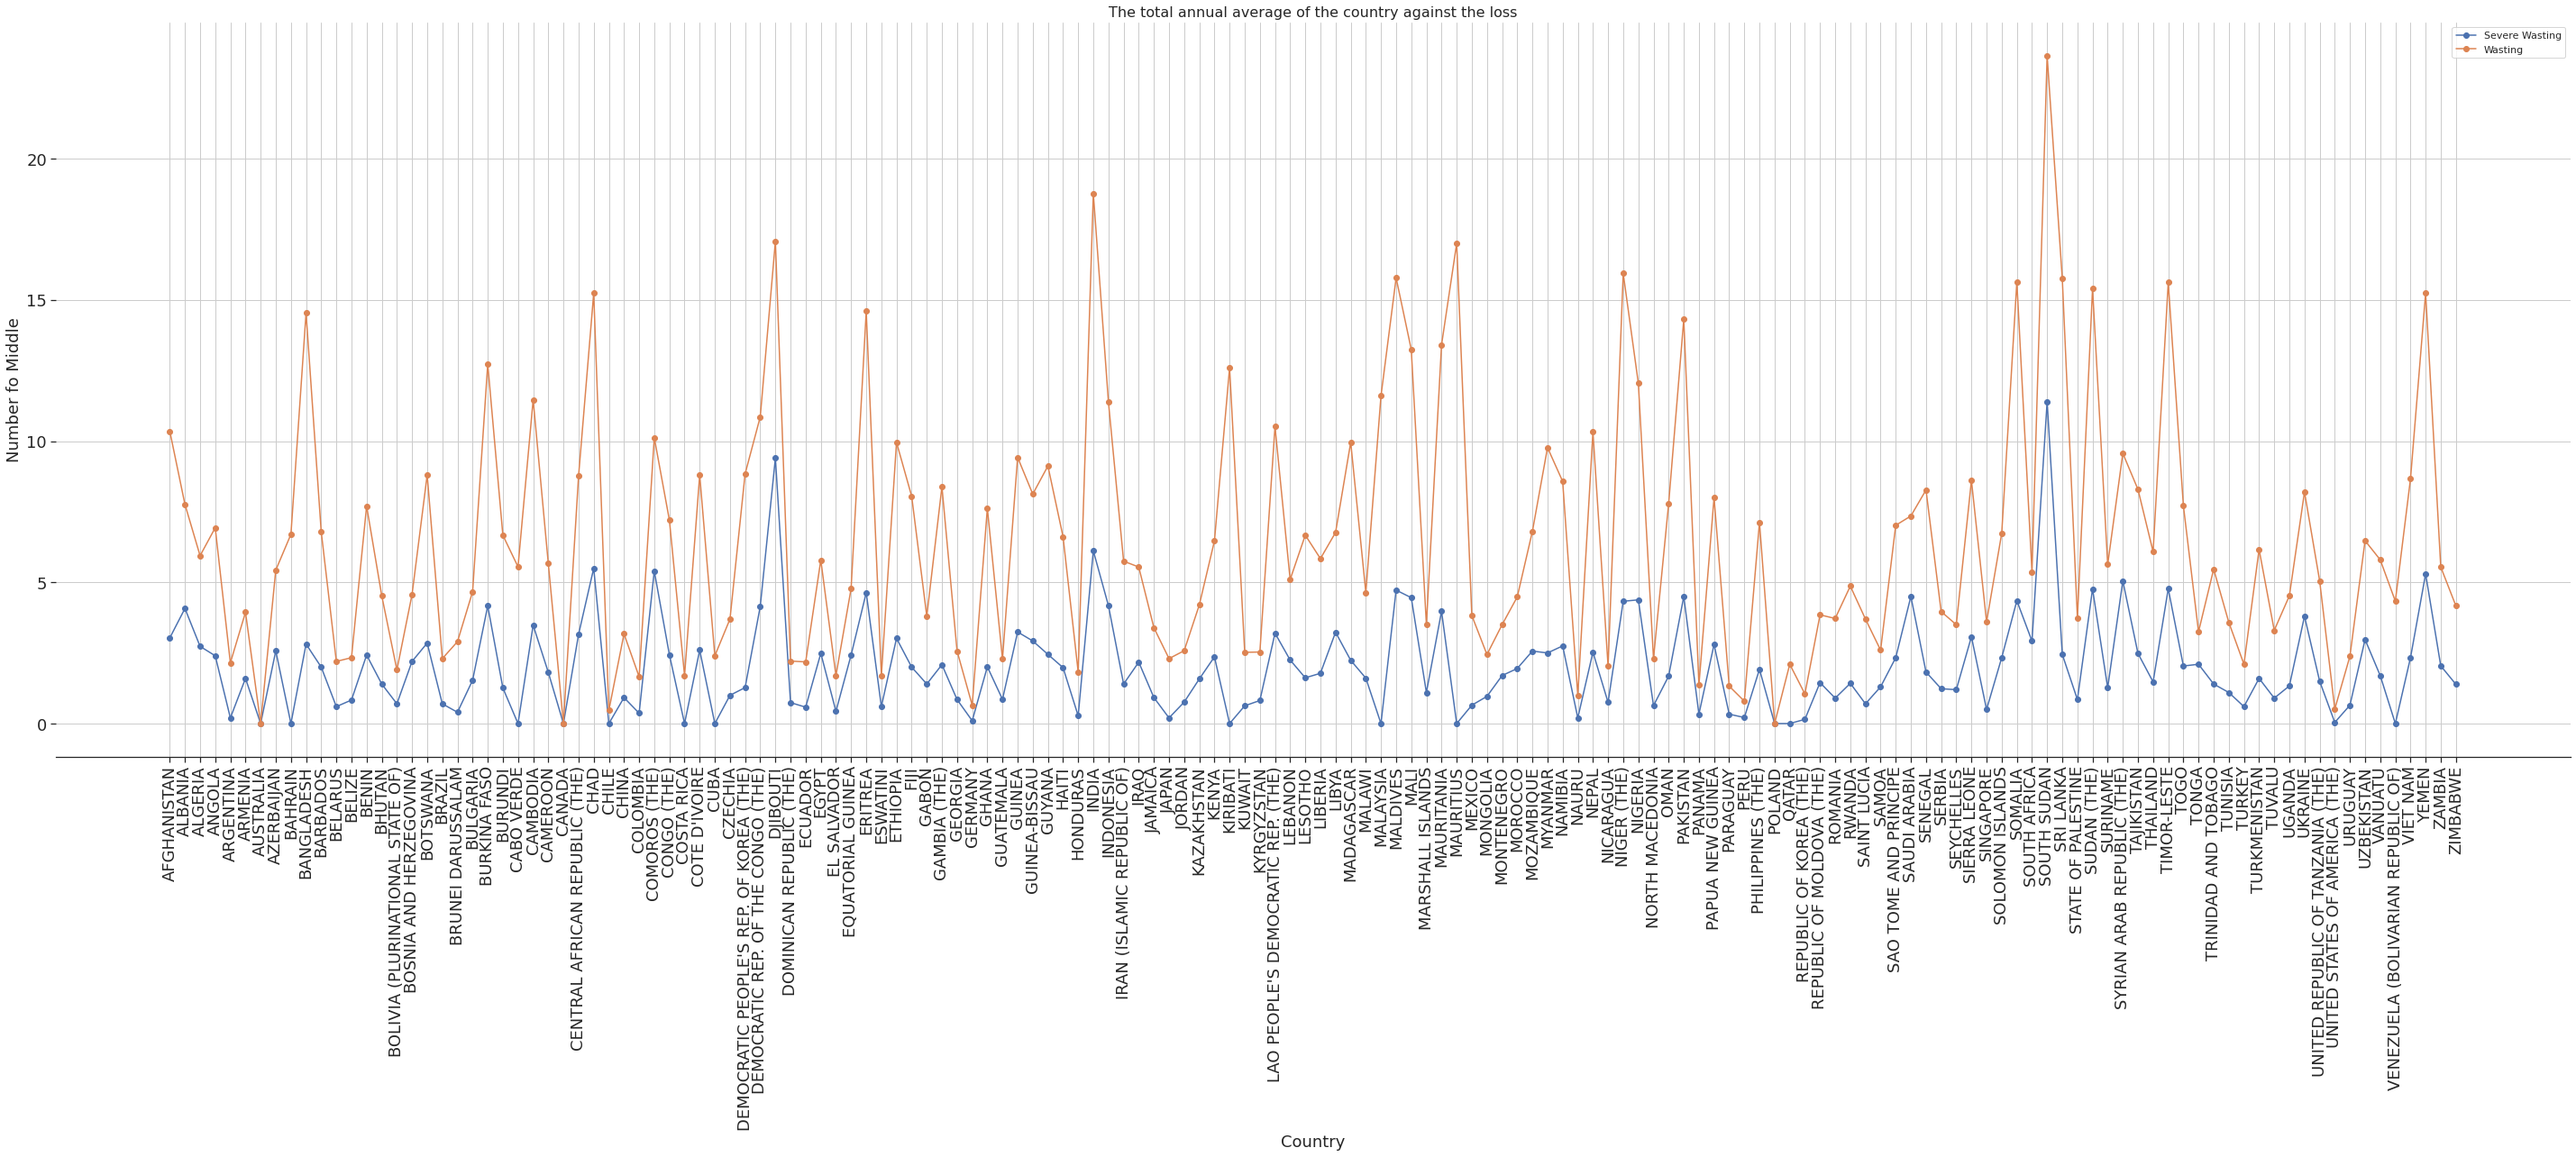

In [21]:
fig = plt.figure(figsize=(50,15))
ax = fig.add_subplot(1, 1, 1)
sns.set_theme(style="ticks")
ax.plot(data1['Country'],data1['Severe Wasting'], 'o-',fillstyle='full', label='Severe Wasting')
ax.plot(data1['Country'],data1['Wasting'], 'o-',fillstyle='full', label='Wasting')
# ax.plot(data1['Country'],data1['Overweight'], 'o-',fillstyle='full', label='Overweight')
# ax.plot(data1['Country'],data1['Stunting'], 'o-',fillstyle='full', label='Stunting')
# ax.plot(data1['Country'],data1['Underweight'], 'o-',fillstyle='full', label='Underweight')
ax.set_xlabel('Country', fontsize=18) 
ax.set_ylabel('Number fo Middle', fontsize=18)
ax.set_title("The total annual average of the country against the loss",fontsize=16) 
ax.tick_params(labelsize=18)
ax.set_xticklabels(data1['Country'], rotation=90, ha="center")
sns.despine(left=True);
ax.grid(True)
ax.legend()
plt.show()

8. ภาวะแคระเกร็นใน กลุ่มประเทศ LLDC

In [22]:
fdg=data2[(data2['LLDC or SID2'] == 1)]
dfgd = fdg.groupby(['Country'], sort=True)[['Stunting']].mean().sort_values(by ='Stunting',ascending = False).reset_index()
dfgd.columns = ['Country','Stunting']
dfgd

,Country,Stunting
0,BURUNDI,57.600000
1,NEPAL,51.912500
2,ZAMBIA,48.137500
3,ETHIOPIA,47.842857
4,AFGHANISTAN,47.775000
5,RWANDA,46.311111
6,NIGER (THE),46.000000
7,MALAWI,45.833333
8,LAO PEOPLE'S DEMOCRATIC REP. (THE),44.928571
9,BHUTAN,44.250000


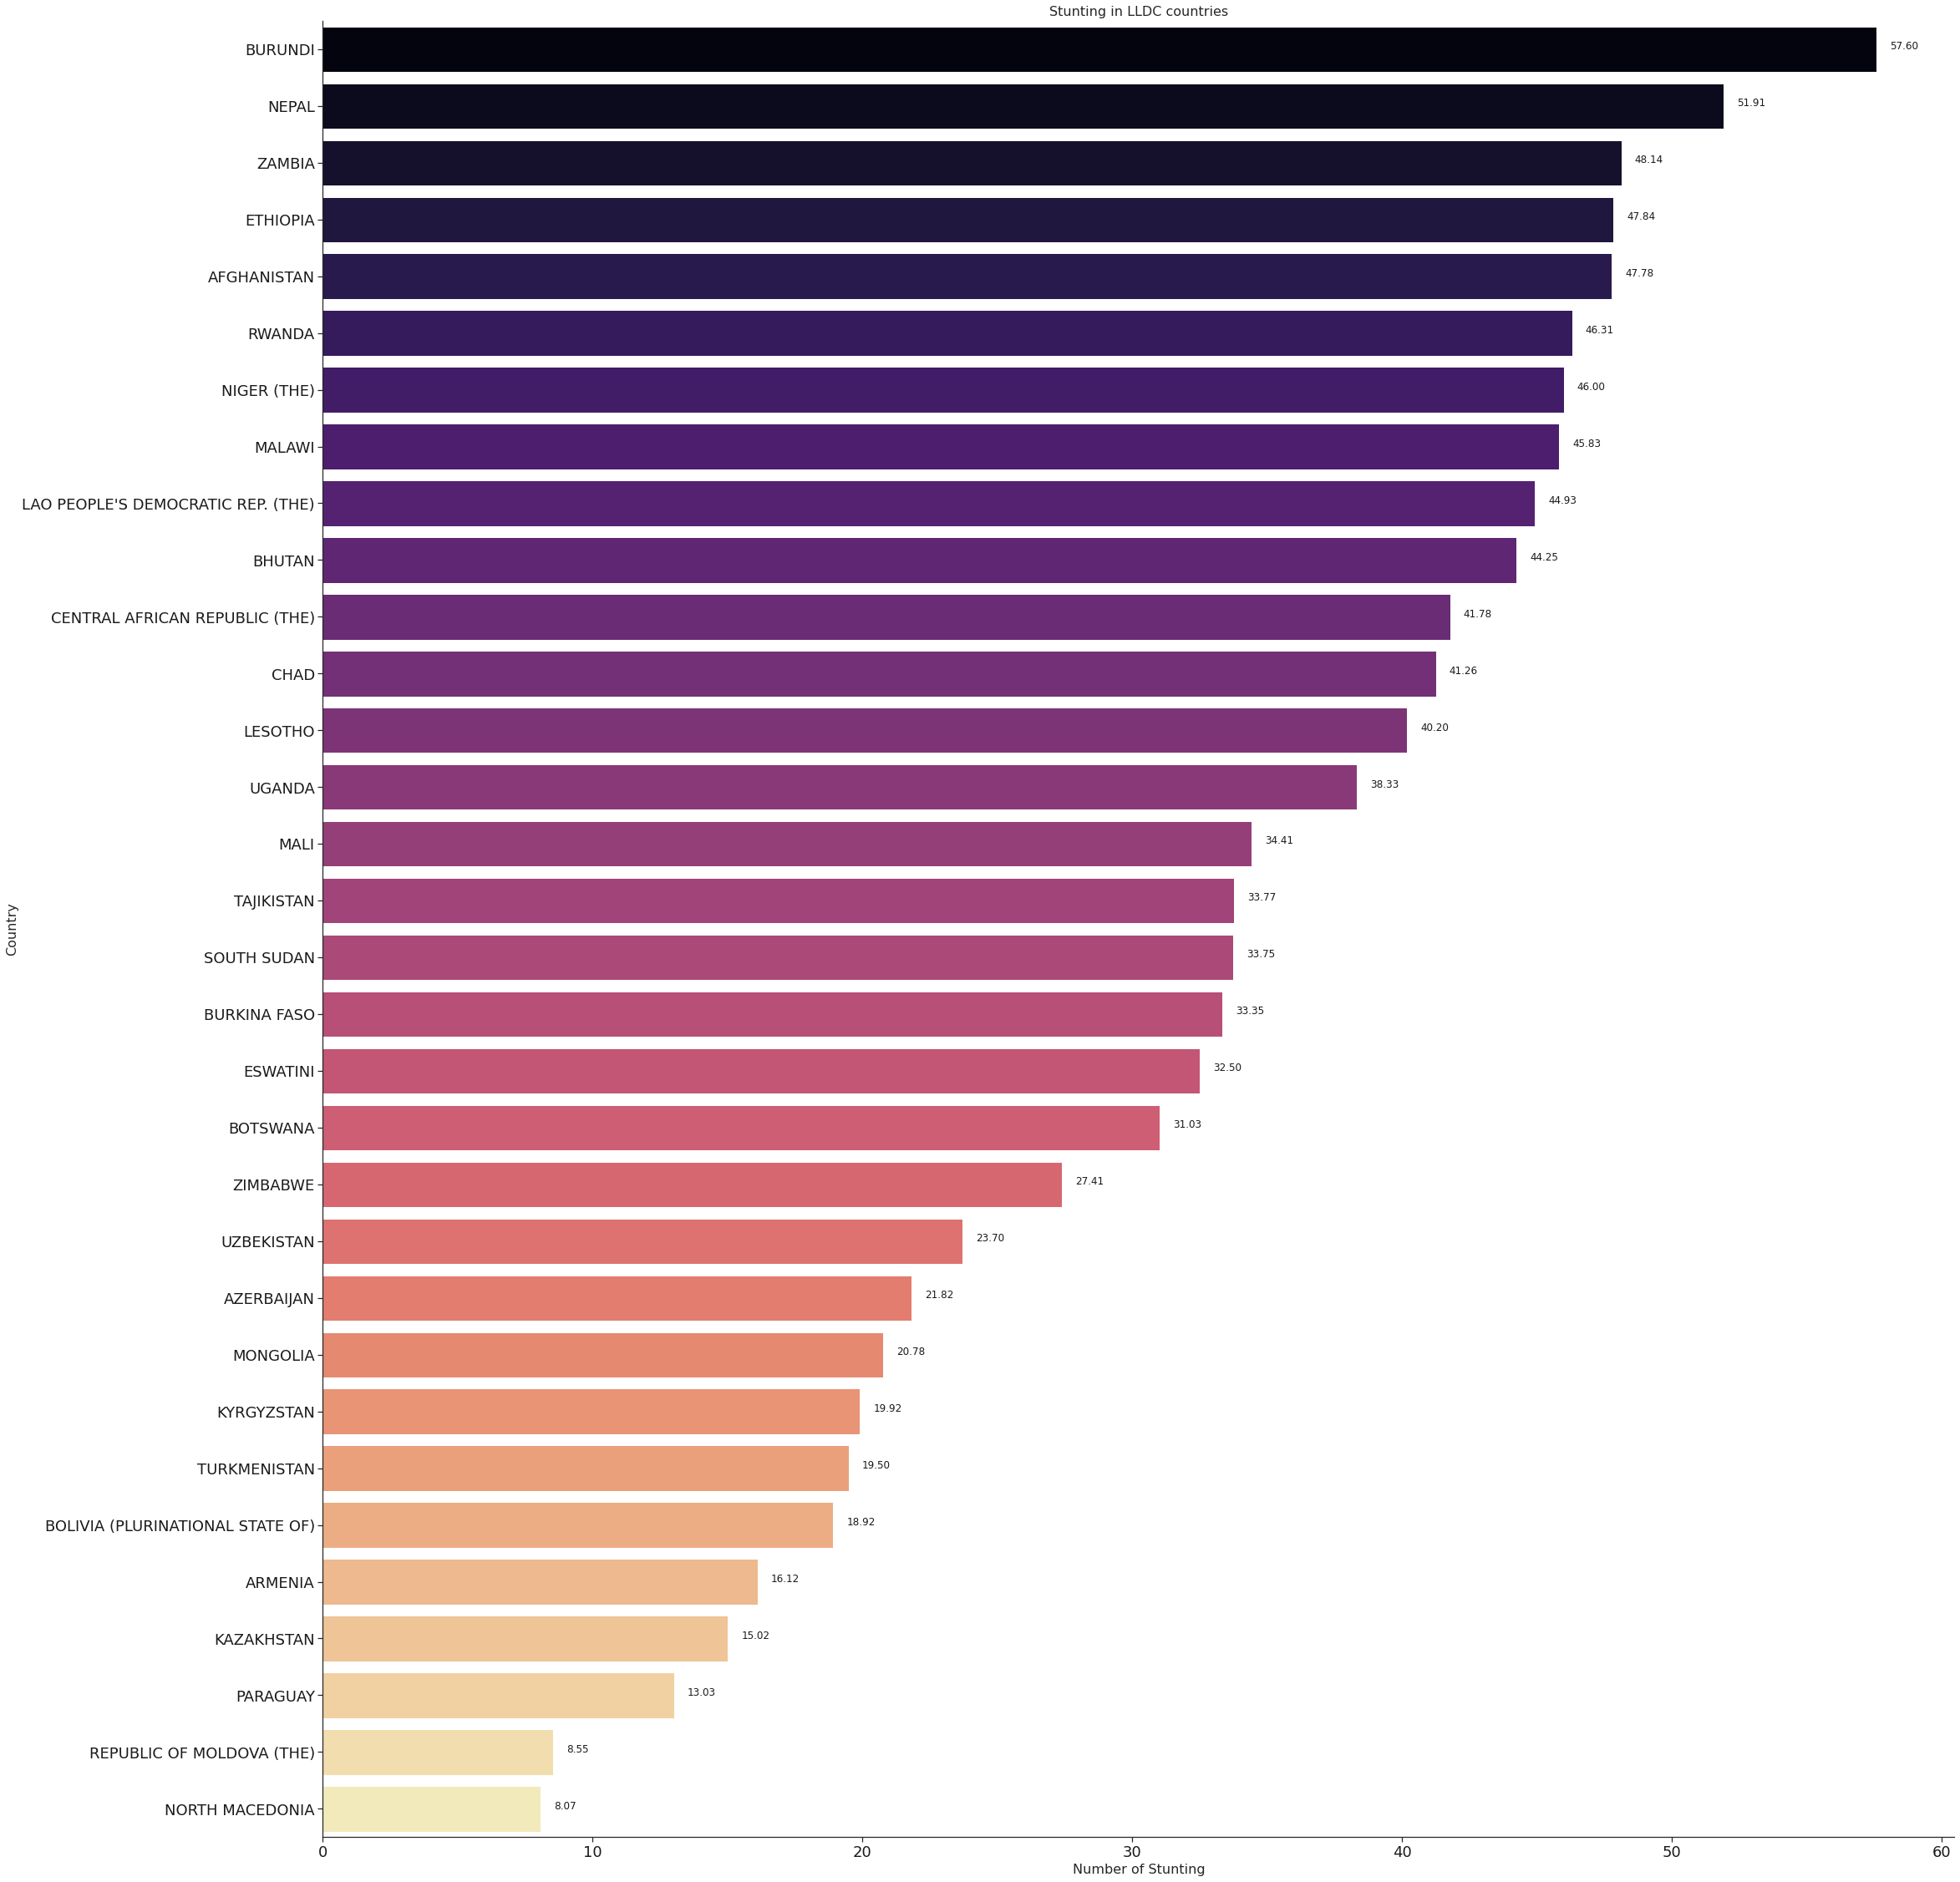

In [23]:
#8. ภาวะแคระเกร็นใน กลุ่มประเทศ LLDC

plt.figure(figsize=(35,40))

sas = sns.barplot(x="Stunting", y="Country", data=dfgd, palette = 'magma')
plt.title('Stunting in LLDC countries', fontsize=16)
plt.tick_params(labelsize=16)
plt.ylabel('Country',fontsize=16);
plt.xlabel('Number of Stunting',fontsize=16);
for i, v in dfgd['Stunting'].items():  
  sas.text(v+0.5,i, "{:,.2f}".format(v), color='k',rotation=0)
plt.tick_params(labelsize=18,labelcolor='k')
sns.despine( right=True, left=False, );
plt.show()

In [25]:
wee=data2[(data2['LDC'] == 1)]
poi = wee.groupby(['Country'], sort=True)[['Underweight']].sum().sort_values(by ='Underweight',ascending = False).reset_index()
poi.columns = ['Country','Underweight']
poi

,Country,Underweight
0,BANGLADESH,1110.4
1,NIGER (THE),420.9
2,BURKINA FASO,326.0
3,NEPAL,295.6
4,MYANMAR,267.8
5,YEMEN,264.5
6,MALAWI,261.1
7,MADAGASCAR,240.2
8,SENEGAL,228.2
9,MAURITANIA,223.8


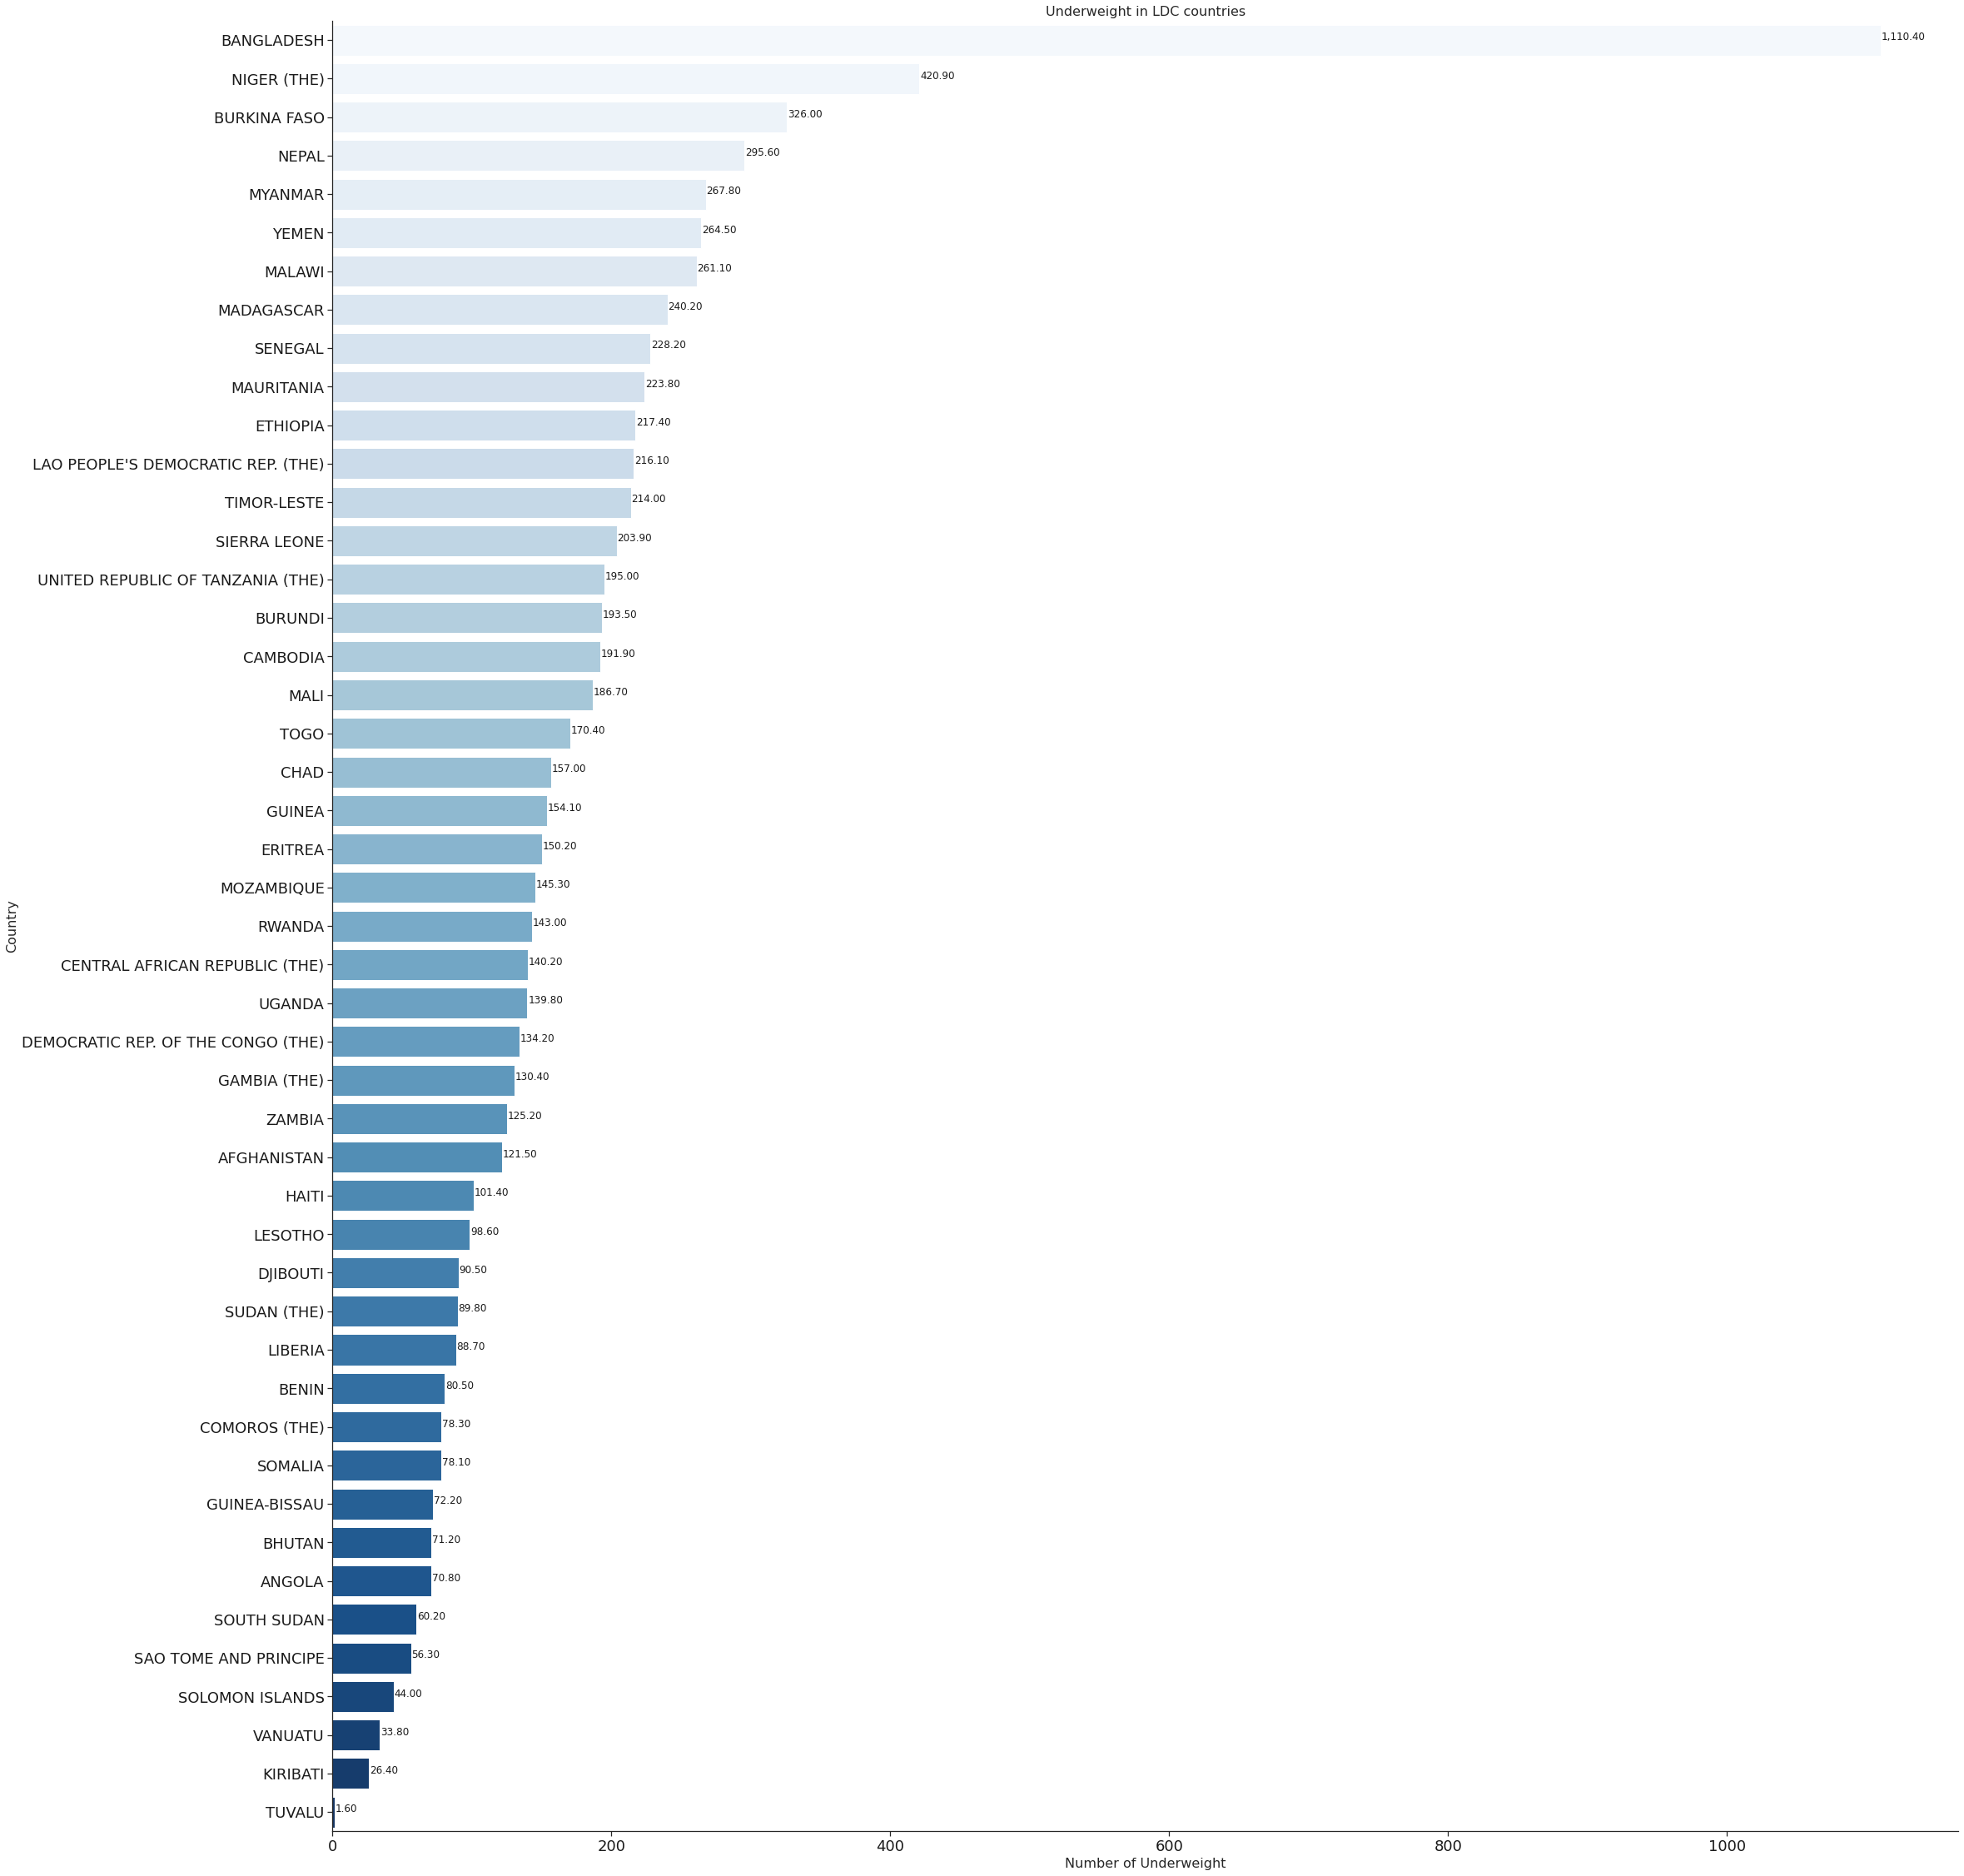

In [26]:
#9 ประเทศที่มีการพัฒนาน้อย(LDC)มีจำนวนคนขาดสารอาหาร(Underweight)เท่าใด

plt.figure(figsize=(35,40))

sas = sns.barplot(x="Underweight", y="Country", data=poi, palette = 'Blues')
plt.title('Underweight in LDC countries', fontsize=16)
plt.tick_params(labelsize=16)
plt.ylabel('Country',fontsize=16);
plt.xlabel('Number of Underweight',fontsize=16);
for i, v in poi['Underweight'].items():  
  sas.text(v+0.5,i, "{:,.2f}".format(v), color='k',rotation=0)
# sa.annotate('Mediterranean is the Cause most born ',xy=(500, 0.5),size=16,xycoords='data',xytext=(-80, -40), textcoords='offset points', arrowprops=dict(arrowstyle="fancy",fc="0.5", ec="none",connectionstyle="angle3,angleA=1,angleB=-70"))
plt.tick_params(labelsize=18,labelcolor='k')
sns.despine( right=True, left=False, );
plt.show()

In [27]:
#10 อยากทราบการเปรียบเทียบในเรื่องของประเทศตามกลุ่มของรายได้(Income Classification)และการส่งผลต่อน้ำหนักทั้ง Overweight และ Underweight ว่ามีความสอดคล้องกันหรือไม่
# Low Income--------------------------------------------------------
fgh0=data2[(data2['Income Classification'] == 0)]
fgh0_ = fgh0.groupby(['Country'], sort=True)[['Overweight','Underweight']].mean().sort_values(by ='Country',ascending = False).reset_index()
fgh0_.columns = ['Country','Overweight','Underweight']
fgh0_
# Lower Middle Income--------------------------------------------------------
fgh1=data2[(data2['Income Classification'] == 1)]
fgh1_ = fgh1.groupby(['Country'], sort=True)[['Overweight','Underweight']].mean().sort_values(by ='Country',ascending = False).reset_index()
fgh1_.columns = ['Country','Overweight','Underweight']
fgh1_
# Upper Middle Income--------------------------------------------------------
fgh2=data2[(data2['Income Classification'] == 2)]
fgh2_ = fgh2.groupby(['Country'], sort=True)[['Overweight','Underweight']].mean().sort_values(by ='Country',ascending = False).reset_index()
fgh2_.columns = ['Country','Overweight','Underweight']
fgh2_
# High Income--------------------------------------------------------
fgh3=data2[(data2['Income Classification'] == 3)]
fgh3_ = fgh3.groupby(['Country'], sort=True)[['Overweight','Underweight']].mean().sort_values(by ='Country',ascending = False).reset_index()
fgh3_.columns = ['Country','Overweight','Underweight']
fgh3_


,Country,Overweight,Underweight
0,URUGUAY,7.857143,5.128571
1,UNITED STATES OF AMERICA (THE),7.414286,0.628571
2,TRINIDAD AND TOBAGO,6.633333,5.133333
3,SINGAPORE,2.600000,3.300000
4,SEYCHELLES,8.000000,4.300000
5,SAUDI ARABIA,3.650000,9.400000
6,REPUBLIC OF KOREA (THE),6.750000,0.800000
7,QATAR,10.400000,4.800000
8,POLAND,0.000000,0.000000
9,PANAMA,9.066667,4.733333


จากกราฟกลุ่มรายได้ Low Income(0) 
Lower Middle Income(1)
Upper Middle Income(2)
High Income(3)

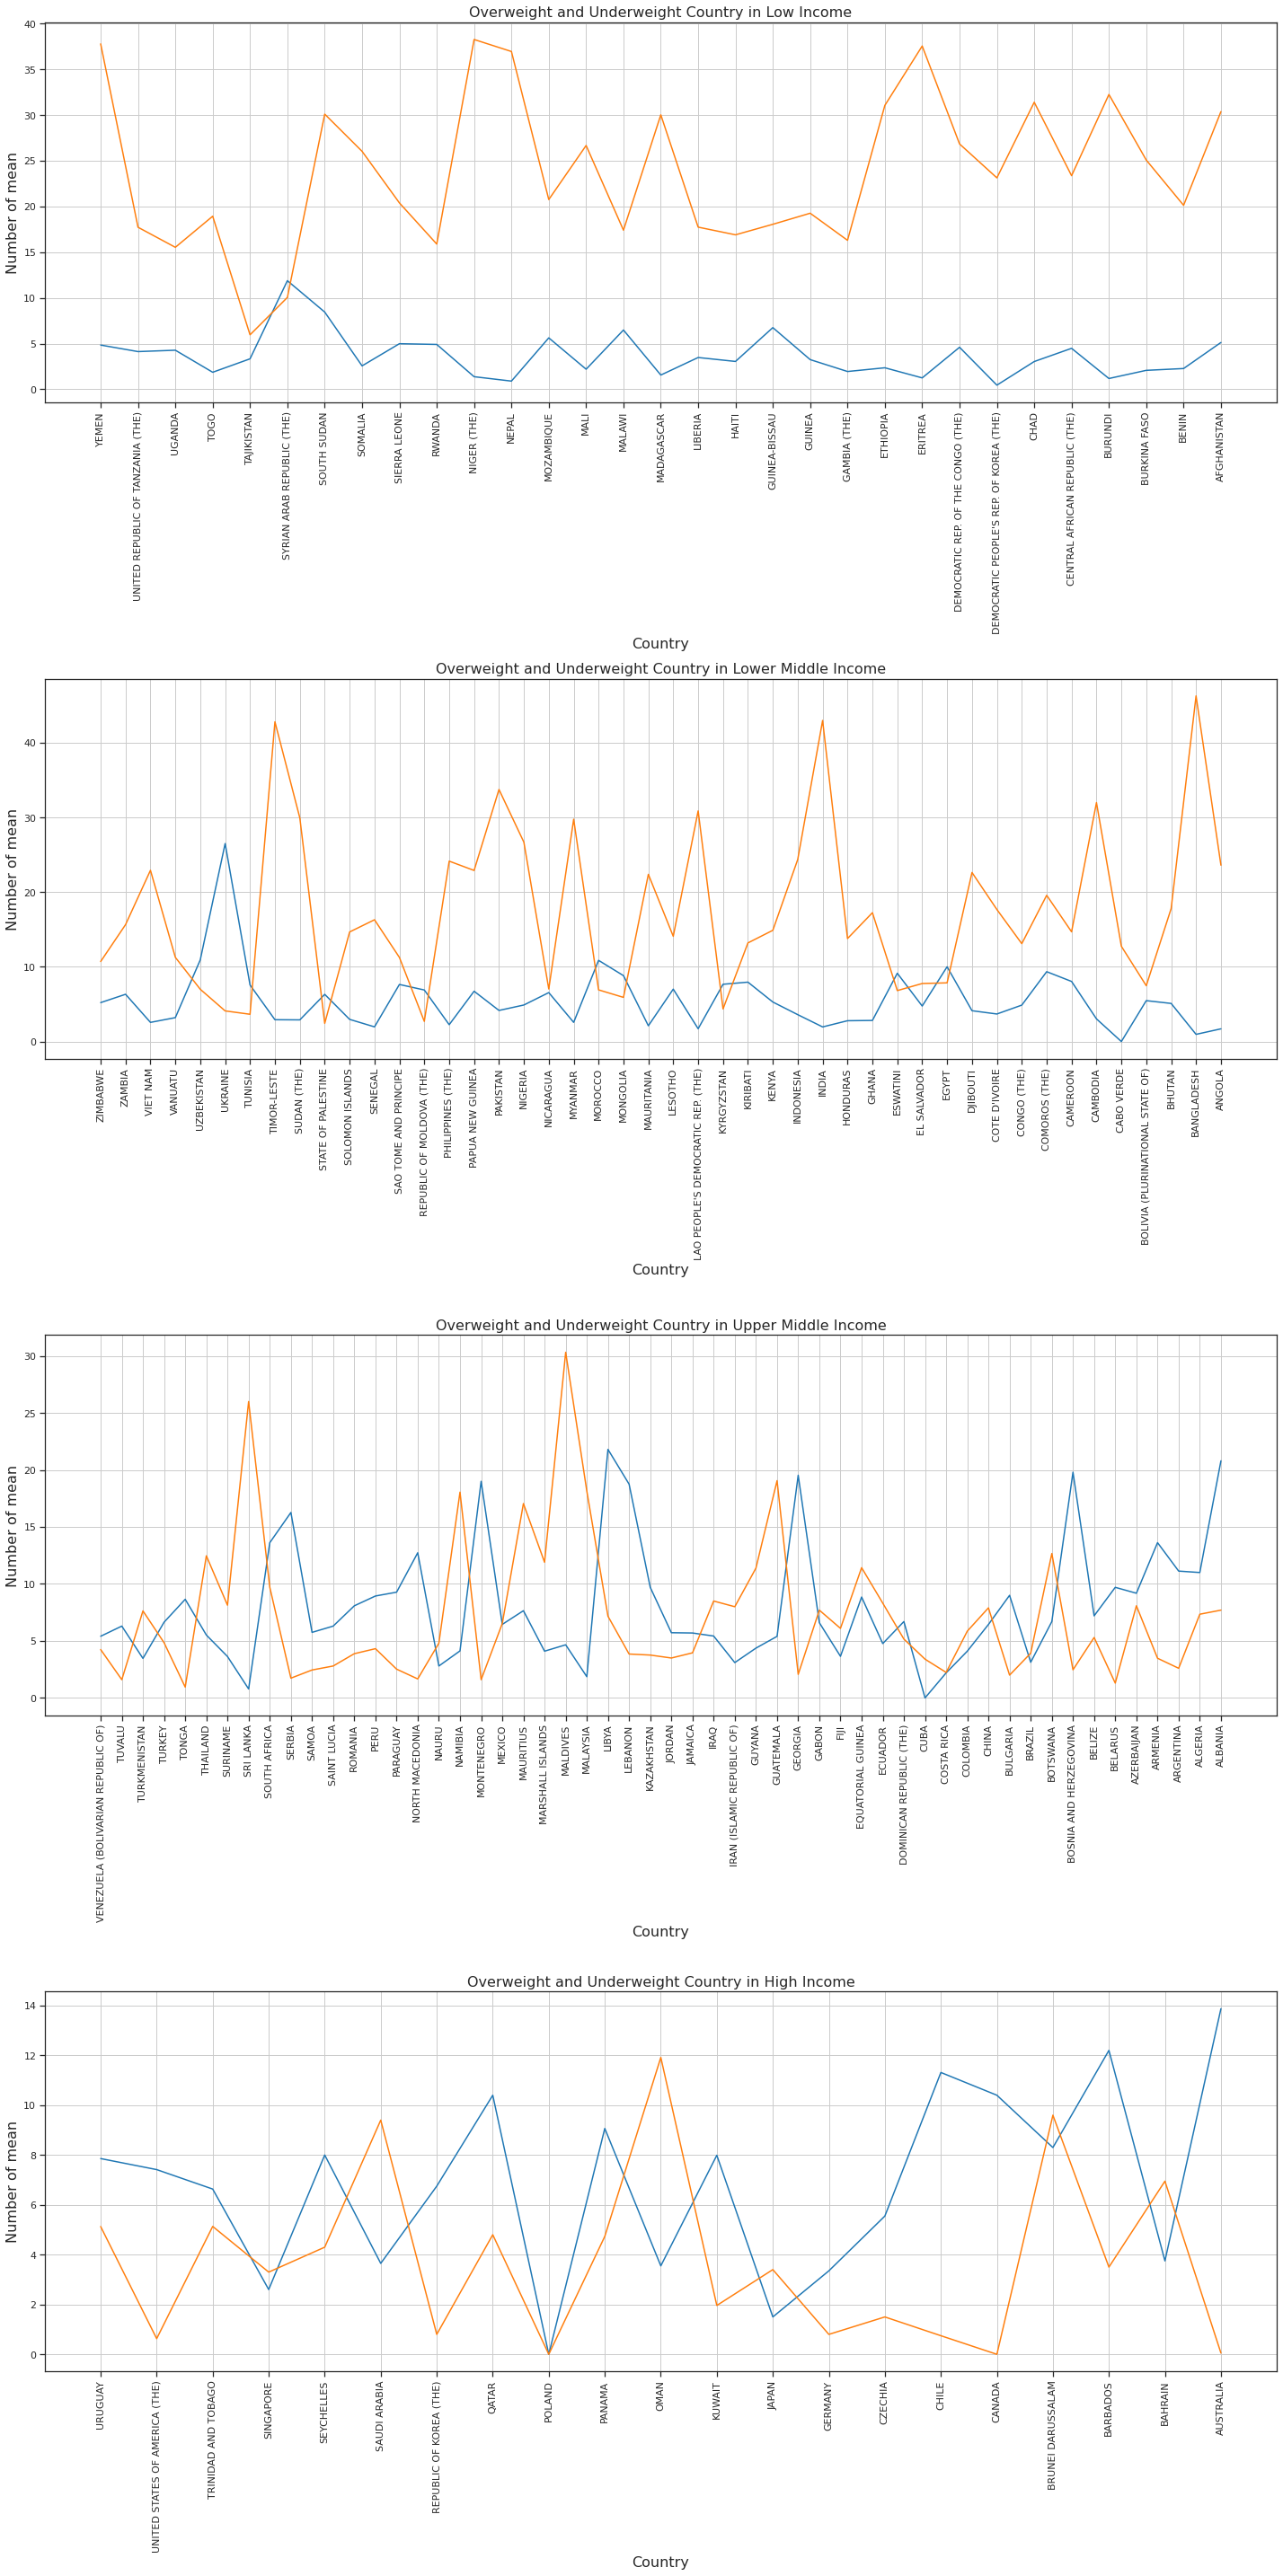

In [28]:
plt.figure(figsize=(20,40))
plt.subplot(4, 1, 1)
plt.plot(fgh0_['Country'],fgh0_['Overweight'], '-', label='Overweight', color='tab:BLUE')
plt.plot(fgh0_['Country'],fgh0_['Underweight'], '-', label='Underweight', color='tab:orange')
plt.title('Overweight and Underweight Country in Low Income',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of mean', fontsize=16)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(fgh1_['Country'],fgh1_['Overweight'], '-', label='Overweight', color='tab:BLUE')
plt.plot(fgh1_['Country'],fgh1_['Underweight'], '-', label='Underweight', color='tab:orange')
plt.title('Overweight and Underweight Country in Lower Middle Income',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of mean', fontsize=16)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(fgh2_['Country'],fgh2_['Overweight'], '-', label='Overweight', color='tab:BLUE')
plt.plot(fgh2_['Country'],fgh2_['Underweight'], '-', label='Underweight', color='tab:orange')
plt.title('Overweight and Underweight Country in Upper Middle Income',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of mean', fontsize=16)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(fgh3_['Country'],fgh3_['Overweight'], '-', label='Overweight', color='tab:BLUE')
plt.plot(fgh3_['Country'],fgh3_['Underweight'], '-', label='Underweight', color='tab:orange')
plt.title('Overweight and Underweight Country in High Income',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of mean', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

11. ประเทศที่รายได้ระดับ 3 มีประเทศอะไรบ้าง และมีสถานะ Wasting เป็นอย่างไร

In [30]:
sdfs=data2[(data2['Income Classification'] == 3)]
sdfs1 = sdfs.groupby(['Country'], sort=True)[['Wasting']].mean().sort_values(by ='Country',ascending = False).head(10).reset_index()
sdfs1.columns = ['Country','Wasting']
sdfs1

,Country,Wasting
0,URUGUAY,2.042857
1,UNITED STATES OF AMERICA (THE),0.514286
2,TRINIDAD AND TOBAGO,5.466667
3,SINGAPORE,3.600000
4,SEYCHELLES,3.500000
5,SAUDI ARABIA,7.350000
6,REPUBLIC OF KOREA (THE),1.050000
7,QATAR,2.100000
8,POLAND,0.000000
9,PANAMA,1.366667


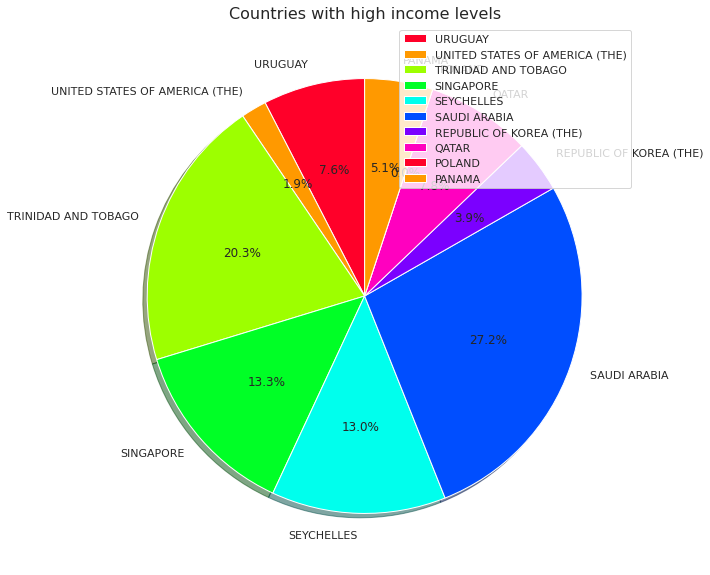

In [31]:
#11. ประเทศที่รายได้ระดับ 3 มีประเทศอะไรบ้าง และมีสถานะ Wasting เป็นอย่างไร

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
labels = sdfs1['Country']
sizes = sdfs1['Wasting']
ax.pie(sizes,labels=labels, autopct='%.1f%%', shadow=True, startangle=90, colors=colors)
# ประเทศที่รายได้ระดับ high income
ax.set_title("Countries with high income levels",fontsize=16)
ax.legend(labels, loc='upper right')
ax.set_aspect('equal')
plt.show()